In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from solvers import FEM_HelmholtzImpedance, Exact_HelmholtzImpedance_const
%load_ext autoreload
%autoreload 2
plt.rcParams["figure.autolayout"] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Number of elements and frequency

In [11]:
N_set = np.concatenate((
    np.linspace(1e01, 1e02, 6, endpoint=False, dtype=int),
    np.linspace(1e02, 1e03, 9, endpoint=False, dtype=int),
    np.linspace(1e03, 1e04, 10, endpoint=True, dtype=int),
    ))

k_set = np.linspace(0, 200, 9)[1:] * (np.pi / 2)

In [12]:
# N_set = np.linspace(2, 100, 25, endpoint=False, dtype=int)
# k_set = np.linspace(0, 8, 9)[1:] * np.pi / 2

## Defining the parameters of the equation

In [13]:
f = lambda x: 1  # Source function
a, b = -1, +1  # Domain
ga, gb = 0, 1  # Values at the boundaries

## Solving the equation

In [14]:
errors = []
for k in k_set:
    errors_k = []

    # Exact solution
    u, u_x = Exact_HelmholtzImpedance_const(f(0), k, a, b, ga, gb)

    # Numerical solutions
    for N in N_set:
        print('Solving for'
            + f' k = {round(k / (np.pi / 2))}π/2,'.ljust(12)
            + f' N = {N}'.ljust(12)
            + ' in progress...')

        solver = FEM_HelmholtzImpedance(f=f, k=k, a=a, b=b, ga=ga, gb=gb, N=N, N_quad=100)
        solver.solve()
        r = solver.sol
        r_x = solver.der

        errors_k.append(solver.H1_error(u, u_x))

    errors.append(errors_k)

Solving for k = 25π/2,  N = 10      in progress...
Solving for k = 25π/2,  N = 25      in progress...
Solving for k = 25π/2,  N = 40      in progress...
Solving for k = 25π/2,  N = 55      in progress...
Solving for k = 25π/2,  N = 70      in progress...
Solving for k = 25π/2,  N = 85      in progress...


/home/sepeehr/anaconda3/envs/mcss/lib/python3.9/site-packages/scipy/special/orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))


Solving for k = 25π/2,  N = 100     in progress...
Solving for k = 25π/2,  N = 200     in progress...
Solving for k = 25π/2,  N = 300     in progress...
Solving for k = 25π/2,  N = 400     in progress...
Solving for k = 25π/2,  N = 500     in progress...
Solving for k = 25π/2,  N = 600     in progress...
Solving for k = 25π/2,  N = 700     in progress...
Solving for k = 25π/2,  N = 800     in progress...
Solving for k = 25π/2,  N = 900     in progress...
Solving for k = 25π/2,  N = 1000    in progress...
Solving for k = 25π/2,  N = 2000    in progress...
Solving for k = 25π/2,  N = 3000    in progress...
Solving for k = 25π/2,  N = 4000    in progress...
Solving for k = 25π/2,  N = 5000    in progress...
Solving for k = 25π/2,  N = 6000    in progress...


KeyboardInterrupt: 

## Plotting the order of accuracy

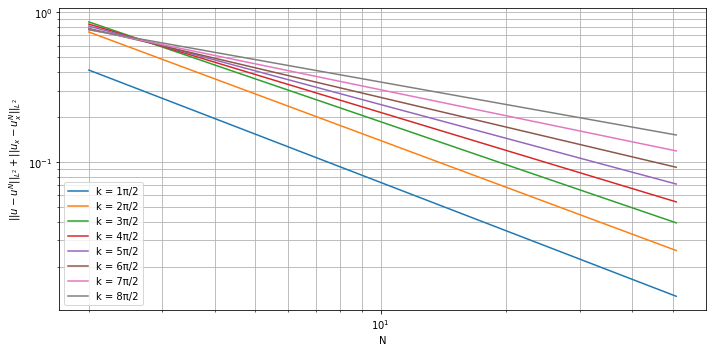

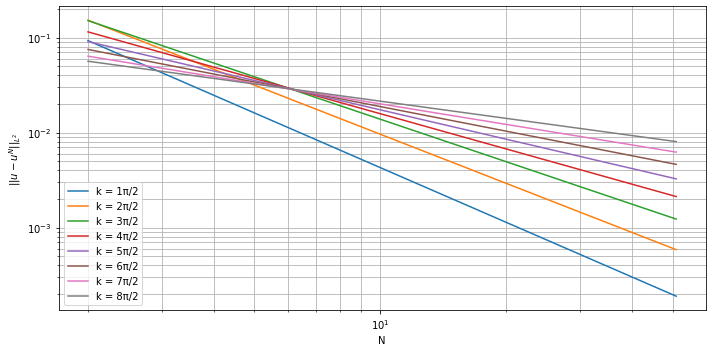

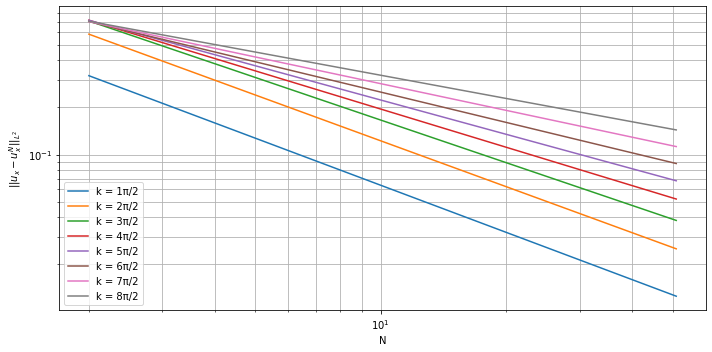

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]

# H1 error
fig, axs = plt.subplots()
fig.tight_layout(pad=3.0)
for idx, k in enumerate(k_set):
    axs.plot(N_set, [error[0] for error in errors[idx]], label=f'k = {round(k / (np.pi / 2))}π/2')
axs.set(xscale='log', yscale='log', xlabel='N', ylabel='$||u - u^N||_{L^2} + ||u_x - u^N_x||_{L^2}$')
axs.grid(which='both')
axs.legend()

# L2 norm of u error
fig, axs = plt.subplots()
fig.tight_layout(pad=3.0)
for idx, k in enumerate(k_set):
    axs.plot(N_set, [error[1] for error in errors[idx]], label=f'k = {round(k / (np.pi / 2))}π/2')
axs.set(xscale='log', yscale='log', xlabel='N', ylabel='$||u - u^N||_{L^2}$')
axs.grid(which='both')
axs.legend()

# L2 norm of u_x
fig, axs = plt.subplots()
fig.tight_layout(pad=3.0)
for idx, k in enumerate(k_set):
    axs.plot(N_set, [error[2] for error in errors[idx]], label=f'k = {round(k / (np.pi / 2))}π/2')
axs.set(xscale='log', yscale='log', xlabel='N', ylabel='$||u_x - u^N_x||_{L^2}$')
axs.grid(which='both')
axs.legend()
